In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#set this so the graphs open internally
%matplotlib inline

In [5]:
chipotle = pd.read_csv("chipotle.tsv", sep="\t")

# See the first 10 entries

In [9]:
chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Create a bar chart of the top 5 items bought

In [21]:
top5itemsbought = chipotle.groupby(by="item_name")["quantity"].sum().sort_values(ascending=False).head(5)
top5itemsbought

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [23]:
print(top5itemsbought.index)
print(top5itemsbought.values)

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object', name='item_name')
[761 591 506 386 351]


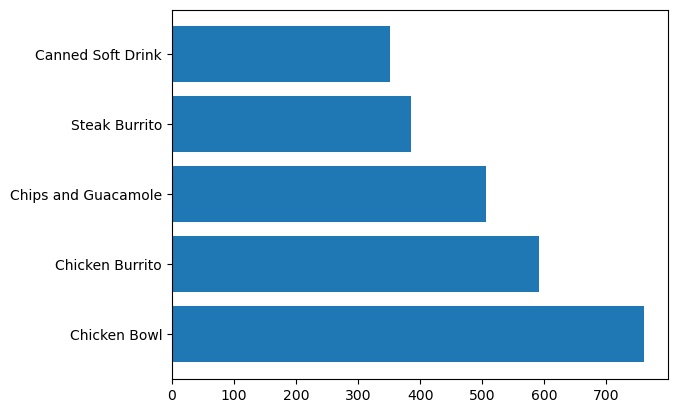

In [29]:
plt.barh(top5itemsbought.index,top5itemsbought.values)
plt.show()

# Create a scatterplot with the number of items ordered per order price

In [53]:
chipotle.item_price = chipotle.item_price.str.replace('$','',regex=False).astype(float)

In [55]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [79]:
itemquantityprice = chipotle.groupby(by="order_id").agg({'quantity':'sum','item_price':'sum'})
itemquantityprice.item_price.sort_values(ascending=False)

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
17       10.08
889      10.08
1014     10.08
1303     10.08
1602     10.08
Name: item_price, Length: 1834, dtype: float64

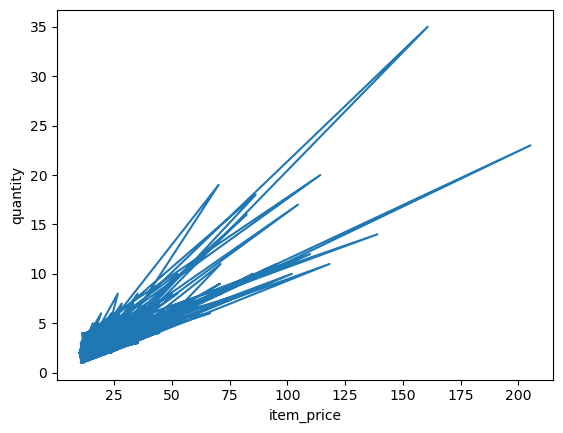

In [87]:
plt.plot(itemquantityprice.item_price,itemquantityprice.quantity)
plt.xlabel("item_price")
plt.ylabel("quantity")
plt.show()

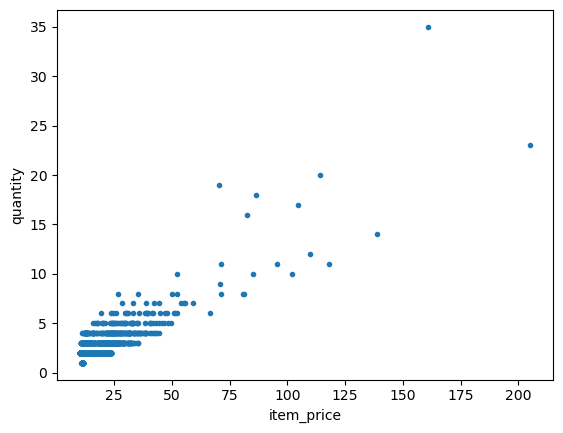

In [91]:
plt.plot(itemquantityprice.item_price,itemquantityprice.quantity,'.')
plt.xlabel("item_price")
plt.ylabel("quantity")
plt.show()

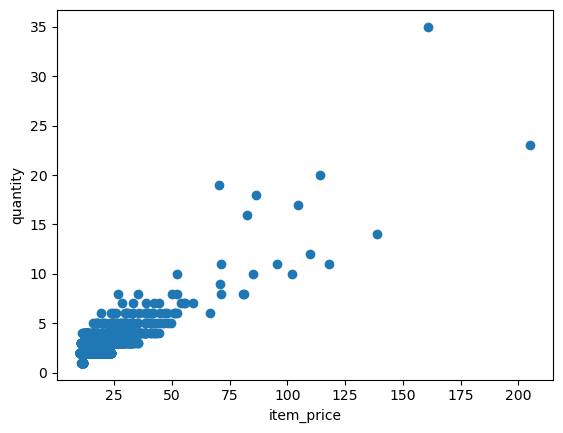

In [89]:
plt.plot(itemquantityprice.item_price,itemquantityprice.quantity,'o')
plt.xlabel("item_price")
plt.ylabel("quantity")
plt.show()

#show the 5 most expensive items on the basis of cost per item

In [97]:
items_quantity_price = chipotle.groupby(by="item_name").agg({'quantity':'sum','item_price':'sum'})
items_quantity_price

,quantity,item_price
item_name,,
6 Pack Soft Drink,55,356.95
Barbacoa Bowl,66,672.36
Barbacoa Burrito,91,894.75
Barbacoa Crispy Tacos,12,120.21
Barbacoa Salad Bowl,10,106.40
Barbacoa Soft Tacos,25,250.46
Bottled Water,211,302.56
Bowl,4,29.60
Burrito,6,44.40


In [115]:
items_price_per_quantity = items_quantity_price.item_price / items_quantity_price.quantity
items_price_per_quantity

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.017500
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.433934
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.376197
Carnitas Burrito                          9.963833
Carnitas Crispy Tacos                     9.745000
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.648791
Chicken Burrito                           9.434552
Chicken Crispy Tacos 

In [119]:
top5_items_by_price_per_quantity = top5_items_by_price_per_quantity.sort_values(ascending=False).head(5)
top5_items_by_price_per_quantity

item_name
Steak Salad Bowl       11.083548
Carnitas Salad Bowl    11.056667
Barbacoa Salad Bowl    10.640000
Carnitas Bowl          10.376197
Steak Bowl             10.227104
dtype: float64

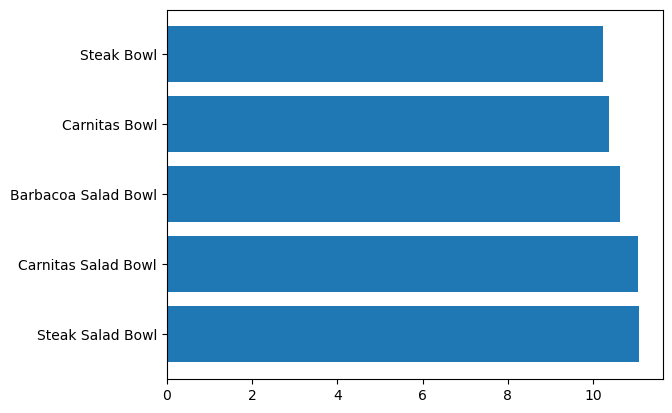

In [121]:
plt.barh(top5_items_by_price_per_quantity.index,top5_items_by_price_per_quantity.values)
plt.show()